<a href="https://colab.research.google.com/github/thegeekcat/learn-to-code/blob/main/python/machine-learning/MachineLearning-SciKitLearn02-Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preparation

## 1.1. Load Basic Modules and Dataset

In [62]:
# Load modules

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [43]:
# Load Dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [44]:
# View an overview of the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# 2. Simple Linear Regression

## 2.1. Prepareation

### Load Data

In [45]:
data = diabetes.data
label = diabetes.target  # Labels
columns = diabetes.feature_names # Column Names

### Make a DataFrame

In [46]:
# Make a DataFrame
data = pd.DataFrame(data, columns=columns)


### Look up Data

In [47]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [48]:
data.shape

(442, 10)

### Load an Algorithm

In [49]:
# Prepare an algorithm
from sklearn.linear_model import LinearRegression

sim_lr = LinearRegression()

## 1.2. Train Dataset

### Split Dataset

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    label, 
                                                    test_size = 0.2, 
                                                    random_state=2023)

### Reshape Datafram

In [52]:
# Reshape dataframe to (-1, 1) -> Otherwise, it's not able for Skitlearn to run the data
X_train['s6'].values.reshape((-1, 1))  # Random rows, 1 column



array([[-0.04664087],
       [ 0.03205916],
       [ 0.03620126],
       [-0.02593034],
       [-0.01764613],
       [ 0.02791705],
       [ 0.00720652],
       [ 0.01963284],
       [-0.0010777 ],
       [ 0.06933812],
       [-0.03835666],
       [-0.01350402],
       [-0.01350402],
       [ 0.01549073],
       [ 0.04448548],
       [-0.03421455],
       [ 0.07348023],
       [ 0.04034337],
       [ 0.02791705],
       [ 0.04448548],
       [ 0.02377494],
       [-0.03835666],
       [-0.00936191],
       [-0.0052198 ],
       [ 0.00720652],
       [ 0.02791705],
       [ 0.04034337],
       [-0.05906719],
       [ 0.02791705],
       [ 0.09833287],
       [ 0.07348023],
       [ 0.02791705],
       [-0.0052198 ],
       [-0.03421455],
       [ 0.0569118 ],
       [-0.04249877],
       [-0.00936191],
       [-0.03835666],
       [ 0.06519601],
       [-0.0010777 ],
       [-0.01764613],
       [-0.03835666],
       [ 0.00720652],
       [-0.03835666],
       [-0.03835666],
       [-0

### Fit data

In [53]:
sim_lr.fit(X_train['s6'].values.reshape((-1,1)), y_train)

LinearRegression()

## 1.3. Prediction

In [54]:
# Need to use 's6' column as a train data
y_pred = sim_lr.predict(X_test['s6'].values.reshape((-1,1)))

In [55]:
# Check a result
y_pred

array([142.24503778, 202.99956903, 154.39594403, 164.11666903,
       173.83739403, 151.96576278, 149.53558153, 147.10540028,
       147.10540028, 229.73156277, 139.81485654, 115.51304404,
       137.38467529, 168.97703153, 120.37340654, 154.39594403,
       176.26757528, 122.80358779, 222.44101902, 164.11666903,
       134.95449404, 130.09413154, 159.25630653, 151.96576278,
       171.40721278, 200.56938778, 139.81485654, 134.95449404,
       173.83739403, 137.38467529, 166.54685028, 154.39594403,
       164.11666903, 130.09413154, 142.24503778, 181.12793778,
       117.94322529, 166.54685028, 144.67521903, 195.70902528,
       130.09413154, 151.96576278, 164.11666903, 173.83739403,
       188.41848153, 132.52431279, 151.96576278, 120.37340654,
       205.42975028, 130.09413154, 156.82612528, 134.95449404,
       132.52431279, 171.40721278, 144.67521903, 144.67521903,
       156.82612528, 147.10540028, 232.16174402, 159.25630653,
       156.82612528,  76.63014404,  91.21123154, 159.25

## 1.4. Check a Result

In [56]:
# Load Modules
from sklearn.metrics import r2_score

In [57]:
print('The Accuracy score of Simple Linear Regression - R2 : {:.2f}'.format(r2_score(y_test, y_pred)))

The Accuracy score of Simple Linear Regression - R2 : 0.16


## 1.5. Visualization


### Scatter Plot

#### a. Draw a Scatter Plot

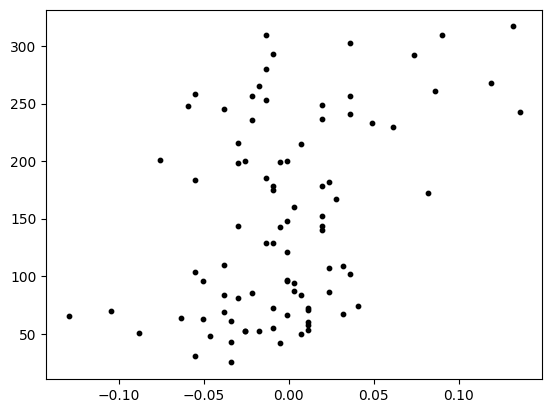

In [66]:
plt.scatter(X_test['s6'], # X-axis
            y_test,       # Y-axis
            s=10,         # Size of dots
            c='black')    # color   

#### b. Add a linear line

In [82]:
# Linear Line
line_x = np.linspace(np.min(X_test['s6']),  # Get min from 's6'
                     np.max(X_test['s6']),  # Get max from 's6'
                     10) # Number of dots

# line_y: Predicted value using Simple Linear Regression
line_y = sim_lr.predict(line_x.reshape((10,1)))

print('line_x: \n', line_x)
print('line_y: \n', line_y)

line_x: 
 [-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
line_y: 
 [ 76.63014404  93.91143293 111.19272182 128.4740107  145.75529959
 163.03658848 180.31787736 197.59916625 214.88045514 232.16174402]


#### c. Draw a scatter plot with a linear line

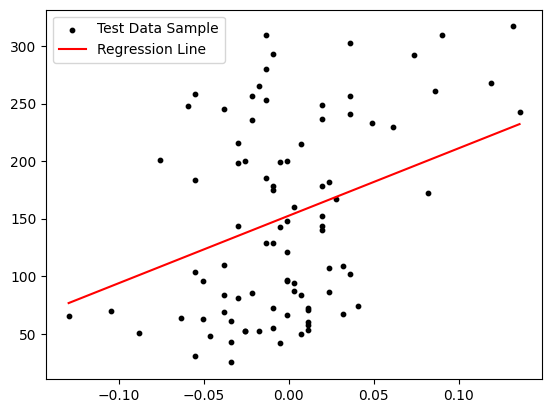

In [88]:
# Scatter Plot
plt.scatter(X_test['s6'],
            y_test,
            s=10,
            c='black')

# Linear Regression
plt.plot(line_x,
          line_y,
          c='red')

# Title
plt.legend(['Test Data Sample', 
           'Regression Line'])

In [108]:
print('The Accuracy score of Simple Linear Regression - R2 : {:.2f}'.format(r2_score(y_test, y_pred)))
print('The Simple Linear Regression - Coefficient(w): {:.4f}, Intercept(b): {:.4f}'.format(sim_lr.coef_[0], sim_lr.intercept_))

The Accuracy score of Simple Linear Regression - R2 : 0.50
The Simple Linear Regression - Coefficient(w): 586.7017, Intercept(b): 152.5980


# 3. Multiple Linear Regression

## 3.1. Load dataset

In [117]:
mul_lr = LinearRegression()


## 3.2. Fit data

In [100]:
mul_lr.fit(X_train, y_train)

LinearRegression()

## 3.3. Prediction

In [101]:
y_pred = mul_lr.predict(X_test)

## 3.4. Check a Result

In [104]:
print('Multiple Linear Regression - R2: {:.2f}'.format(r2_score(y_test, y_pred)))

Multiple Linear Regression - R2: 0.50


# 4. Decision Tree Regressor: 's6'

- Machine Learning Algorithm Based Regression
 - Decision Tree Regressor

## 4.1. Preparation

In [109]:
# Load modules
from sklearn.tree import DecisionTreeRegressor

In [151]:
# Get algorithm
dt_regr = DecisionTreeRegressor(max_depth=5)

## 4.2. Fit Data

In [152]:
dt_regr.fit(X_train['s6'].values.reshape((-1,1)),   # Reshape the column 's6'
            y_train)

DecisionTreeRegressor(max_depth=5)

## 4.3. Prediction

In [153]:
y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

## 4.4. Check a Result

In [154]:
print('Simple Decision Tree Regressor - R2: {:.2f}'.format(r2_score(y_test, y_pred)))

Simple Decision Tree Regressor - R2: 0.14


## 4.5. Visualization

In [155]:
# Add linear line
line_x = np.linspace(np.min(X_test['s6']),
                     np.max(X_test['s6']),
                     10)

line_y = dt_regr.predict(line_x.reshape((-1,1)))

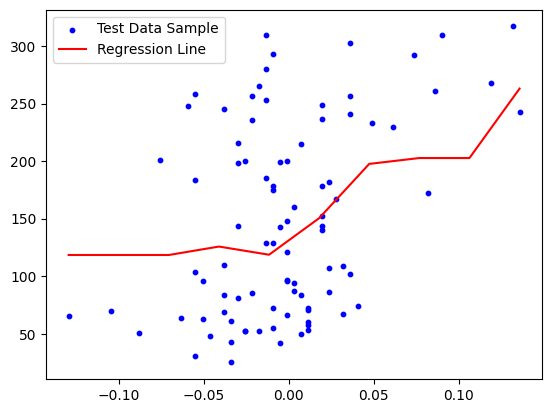

In [156]:
# Draw graphs
plt.scatter(X_test['s6'],
            y_test,
            s=10,
            c='b')

# Linear Regression
plt.plot(line_x,
        line_y,
        c='red')

# Title
plt.legend(['Test Data Sample', 'Regression Line'])

# 5. Multiple Decision Tree Regressor

In [177]:
mt_regre = DecisionTreeRegressor(max_depth=5)

In [179]:
mt_regre.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [180]:
y_pred =  mt_regre.predict(X_test)

In [181]:
print('Multiple Decision Tree Regressor - R2: {:.2f}'.format(r2_score(y_test, y_pred)))

Multiple Decision Tree Regressor - R2: 0.31


# 6. Support Vector Machine Regressor

## 6.1. Preparation

In [186]:
from sklearn.svm import SVR

In [188]:
svm_regre = SVR()

## 6.2. Fit Data

In [190]:
svm_regre.fit(X_train['s6'].values.reshape((-1,1)),
              y_train)

SVR()

## 6.3. Prediction

In [194]:
y_pred = svm_regre.predict(X_test['s6'].values.reshape((-1,1)))

## 6.4. Check a Result

In [195]:
print('Simple Support Vector Machine Regression - R2: {:.2f}'.format(r2_score(y_test, y_pred)))

Simple Support Vector Machine Regression - R2: 0.06


## 6.5. Find better models

* Note: The result of R2 above is too low (R2=0.06), so it needs to be find another solution.

### Try Multiple Support Vector Machine Regressor

In [201]:
svm_regr = SVR()
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('Multiple Support Vector Machine Regressor - R2: {:.2f}'.format(r2_score(y_test,y_pred)))

Multiple Support Vector Machine Regressor - R2: 0.17


### Try Use 'c=2'

In [206]:
m_regr = SVR(C=2)
svm_regr.fit(X_train, y_train)
y_pred = svm_regr.predict(X_test)
print('Multiple Support Vector Machine Regressor - R2: {:.2f}'.format(r2_score(y_test,y_pred)))

Multiple Support Vector Machine Regressor - R2: 0.17


### Try using 'for' statement

In [213]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  m_regr = SVR(C=i)
  m_regr.fit(X_train, y_train)
  y_pred = m_regr.predict(X_test)
  print('Multiple Support Vector Machine Regressor(i={}) - R2: {:.2f}'.format(i,
                                                                              r2_score(y_test, y_pred)))
  
#print('The best solution: \n i = {}, R2 = {} '.format(i, y_pred))

Multiple Support Vector Machine Regressor(i=1) - R2: 0.17
Multiple Support Vector Machine Regressor(i=2) - R2: 0.29
Multiple Support Vector Machine Regressor(i=3) - R2: 0.35
Multiple Support Vector Machine Regressor(i=4) - R2: 0.39
Multiple Support Vector Machine Regressor(i=5) - R2: 0.42
Multiple Support Vector Machine Regressor(i=6) - R2: 0.44
Multiple Support Vector Machine Regressor(i=7) - R2: 0.46
Multiple Support Vector Machine Regressor(i=8) - R2: 0.47
Multiple Support Vector Machine Regressor(i=9) - R2: 0.48
Multiple Support Vector Machine Regressor(i=10) - R2: 0.49
Multiple Support Vector Machine Regressor(i=11) - R2: 0.49
Multiple Support Vector Machine Regressor(i=12) - R2: 0.50
Multiple Support Vector Machine Regressor(i=13) - R2: 0.50
Multiple Support Vector Machine Regressor(i=14) - R2: 0.50
Multiple Support Vector Machine Regressor(i=15) - R2: 0.50
Multiple Support Vector Machine Regressor(i=16) - R2: 0.50
Multiple Support Vector Machine Regressor(i=17) - R2: 0.50
Multip

# 7. Multi Layer Perceptron Regressor

## 7.1. Preparation

In [214]:
from sklearn.neural_network import MLPRegressor

In [215]:
mlp_regr = MLPRegressor()

## 7.2. Fit Data

In [216]:
mlp_regr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

## 7.3. Prediction

In [217]:
y_pred = mlp_regr.predict(X_test)

## 7.4. Check a Result

In [218]:
print('Multi Layer Perception Regressor - S2: {:.2f}'.format(r2_score(y_test, y_pred)))

Multi Layer Perception Regressor - S2: -2.47


## 7.5. Find Better Solutions

### Set hidden layer

In [223]:
mlp_regr = MLPRegressor(hidden_layer_sizes=200)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)
print('Multi Layer Perception Regressor - S2: {:.2f}'.format(r2_score(y_test, y_pred)))

Multi Layer Perception Regressor - S2: -1.81


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Set 'max_iter' : Number of Repeat

In [226]:
mlp_regr = MLPRegressor(hidden_layer_sizes=200, max_iter=100000)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)
print('Multi Layer Perception Regressor - S2: {:.2f}'.format(r2_score(y_test, y_pred)))

Multi Layer Perception Regressor - S2: 0.49
